In [16]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from network_derivs.nn import Linear, Tanh

sns.set()

if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Single input to single output:

In [17]:
samples = 100
X = torch.linspace(1, 5, samples)[:, None]

dX = torch.eye(X.shape[1]) * torch.ones(X.shape[0])[:, None, None] 
d2X = torch.zeros_like(dX)
d3X = torch.zeros_like(dX)

dX = torch.stack((dX, d2X, d3X), dim=1)

data = (X, dX)

In [18]:
#%%
layer_1 = Linear(1, 40)
activation_1 = Tanh()
layer_2 = Linear(40, 40)
activation_2 = Tanh()
layer_3 = Linear(40, 1)

network = nn.Sequential(*[layer_1, activation_1,
                          layer_2, activation_2,
                          layer_3])

In [19]:
f, df = network(data)
print(f.shape, df.shape)

f = f.detach().reshape(samples, 1).cpu().numpy()
df = df.detach().reshape(samples, 3, 1, 1).cpu().numpy()

x_np = np.linspace(1, 5, samples)

torch.Size([100, 1]) torch.Size([100, 3, 1, 1])


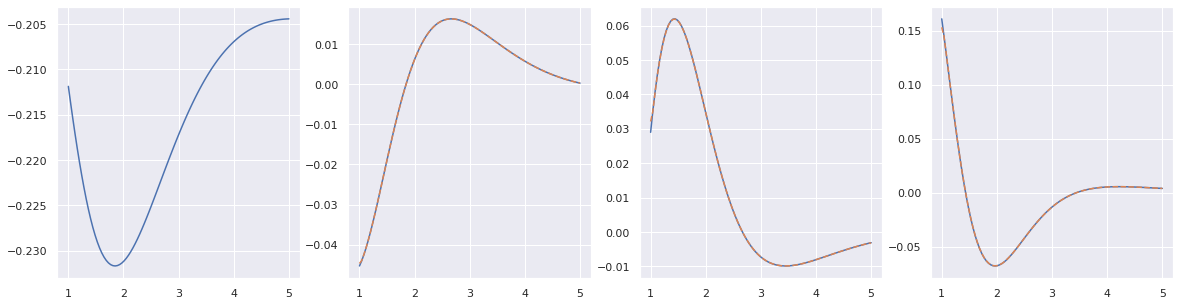

In [20]:
plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.plot(x_np, f)

plt.subplot(142)
plt.plot(x_np, df[:, 0, 0, 0])
plt.plot(x_np, np.gradient(f[:, 0], x_np), '--')

plt.subplot(143)
plt.plot(x_np, df[:, 1, 0, 0])
plt.plot(x_np, np.gradient(df[:, 0, 0, 0], x_np), '--')
#plt.plot(x_np, np.gradient(np.gradient(f[:, 0], x_np), x_np), '-.')

plt.subplot(144)
plt.plot(x_np, df[:, 2, 0, 0])
plt.plot(x_np, np.gradient(df[:, 1, 0, 0], x_np), '--')
#plt.plot(x_np, np.gradient(np.gradient(np.gradient(f[:, 0], x_np), x_np), x_np), '-.')


# Multiple in/out puts

In [21]:
samples = 100
x, y = torch.meshgrid(torch.linspace(-5, 5, samples), torch.linspace(-5, 5, samples))
X = torch.cat((x.reshape(-1, 1), y.reshape(-1, 1)), dim=1)

dX = torch.eye(X.shape[1]) * torch.ones(X.shape[0])[:, None, None] 
d2X = torch.zeros_like(dX)
d3X = torch.zeros_like(dX)

dX = torch.stack((dX, d2X, d3X), dim=1)
data = (X, dX)

In [22]:
#%%
layer_1 = Linear(2, 40)
activation_1 = Tanh()
layer_2 = Linear(40, 40)
activation_2 = Tanh()
layer_3 = Linear(40, 3)

network = nn.Sequential(*[layer_1, activation_1,
                          layer_2, activation_2,
                          layer_3])

f, df = network(data)
print(f.shape, df.shape)

f = f.detach().reshape(samples, samples, 3).cpu().numpy()
df = df.detach().reshape(samples, samples, 3, 2, 3).cpu().numpy()

x_np = np.linspace(-5, 5, samples)

torch.Size([10000, 3]) torch.Size([10000, 3, 2, 3])


Let's look at the first derivative:

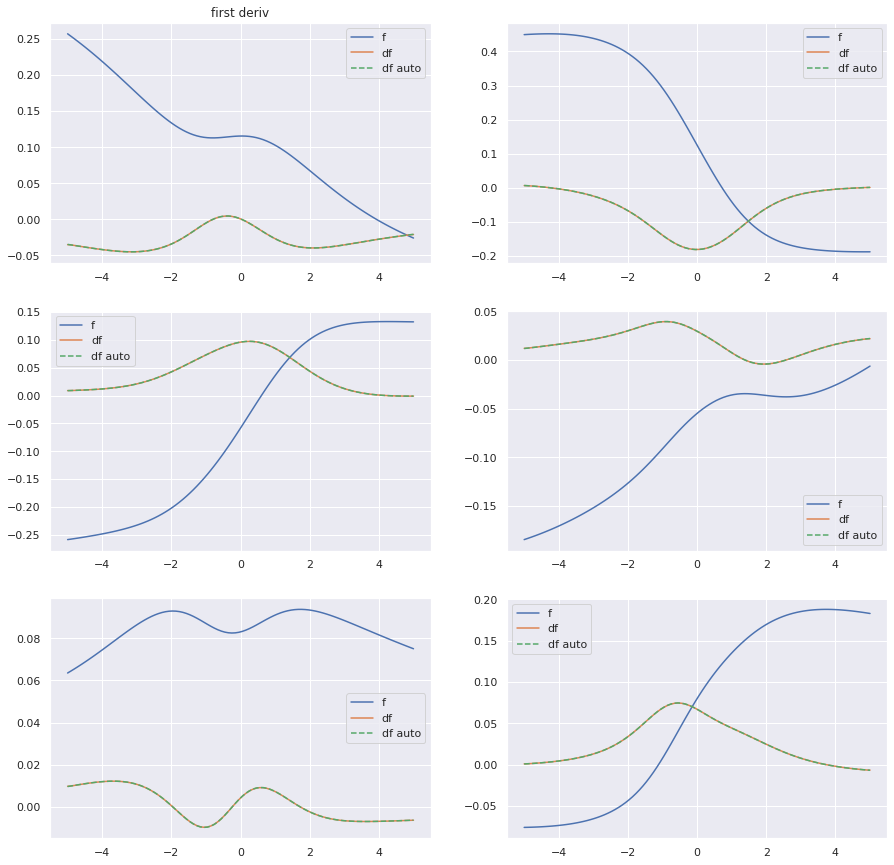

In [23]:
y_slice = 50
x_slice = 50

plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.title('first deriv')
plt.plot(x_np, f[:, y_slice, 0])
plt.plot(x_np, np.gradient(f[:, y_slice, 0], x_np))
plt.plot(x_np, df[:, y_slice, 0, 0, 0], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(322)
plt.plot(x_np, f[x_slice, :, 0])
plt.plot(x_np, np.gradient(f[x_slice, :, 0], x_np))
plt.plot(x_np, df[x_slice, :,0,  1, 0], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(323)
plt.plot(x_np, f[:, y_slice, 1])
plt.plot(x_np, np.gradient(f[:, y_slice, 1], x_np))
plt.plot(x_np, df[:, y_slice, 0, 0, 1], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(324)
plt.plot(x_np, f[x_slice, :, 1])
plt.plot(x_np, np.gradient(f[x_slice, :, 1], x_np))
plt.plot(x_np, df[x_slice, :, 0, 1, 1], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(325)
plt.plot(x_np, f[:, y_slice, 2])
plt.plot(x_np, np.gradient(f[:, y_slice, 2], x_np))
plt.plot(x_np, df[:, y_slice, 0, 0, 2], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(326)
plt.plot(x_np, f[x_slice, :, 2])
plt.plot(x_np, np.gradient(f[x_slice, :, 2], x_np))
plt.plot(x_np, df[x_slice, :,0, 1, 2], '--')

plt.legend(['f', 'df', 'df auto'])

plt.show()

# %%


And the second:

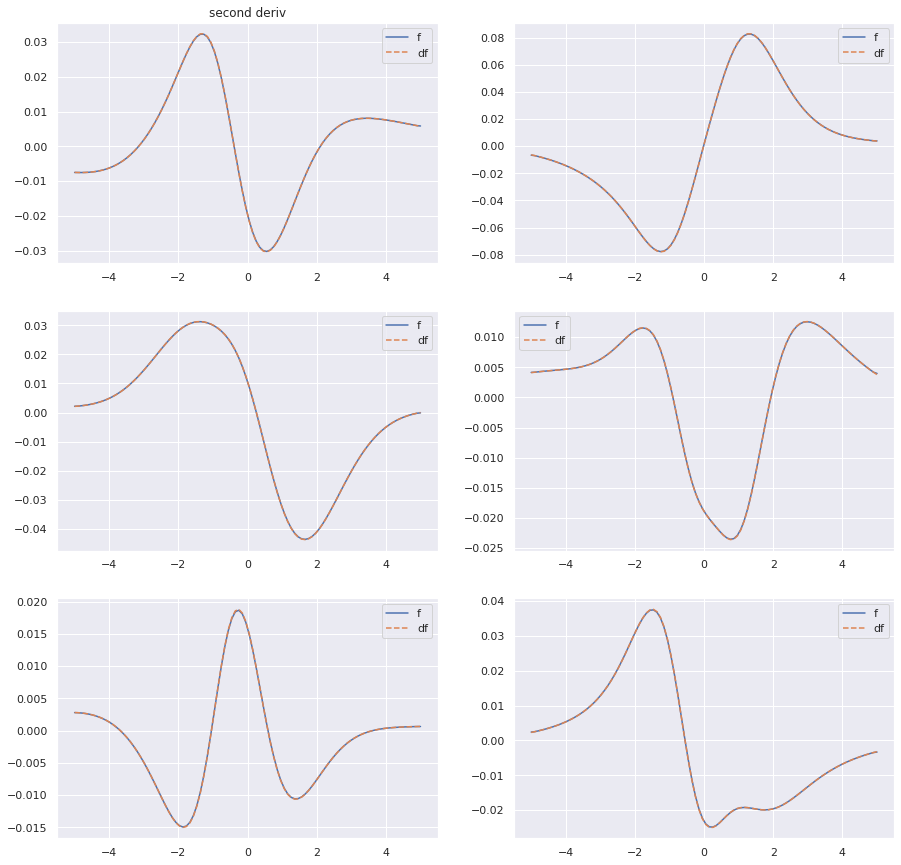

In [24]:
y_slice = 50
x_slice = 50

plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.title('second deriv')
plt.plot(x_np, np.gradient(df[:, y_slice, 0, 0, 0], x_np))
plt.plot(x_np, df[:, y_slice, 1, 0, 0], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(322)
plt.plot(x_np, np.gradient(df[x_slice, :, 0, 1, 0], x_np))
plt.plot(x_np, df[x_slice, :, 1, 1, 0], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(323)
plt.plot(x_np, np.gradient(df[:, y_slice, 0, 0, 1], x_np))
plt.plot(x_np, df[:, y_slice, 1, 0, 1], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(324)
plt.plot(x_np, np.gradient(df[x_slice, :, 0, 1, 1], x_np))
plt.plot(x_np, df[x_slice, :, 1, 1, 1], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(325)
plt.plot(x_np, np.gradient(df[:, y_slice, 0, 0, 2], x_np))
plt.plot(x_np, df[:, y_slice, 1, 0, 2], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(326)
plt.plot(x_np, np.gradient(df[x_slice, :, 0, 1, 2], x_np))
plt.plot(x_np, df[x_slice, :, 1, 1, 2], '--')

plt.legend(['f', 'df', 'df auto'])

plt.show()

# %%


And the third derivative:

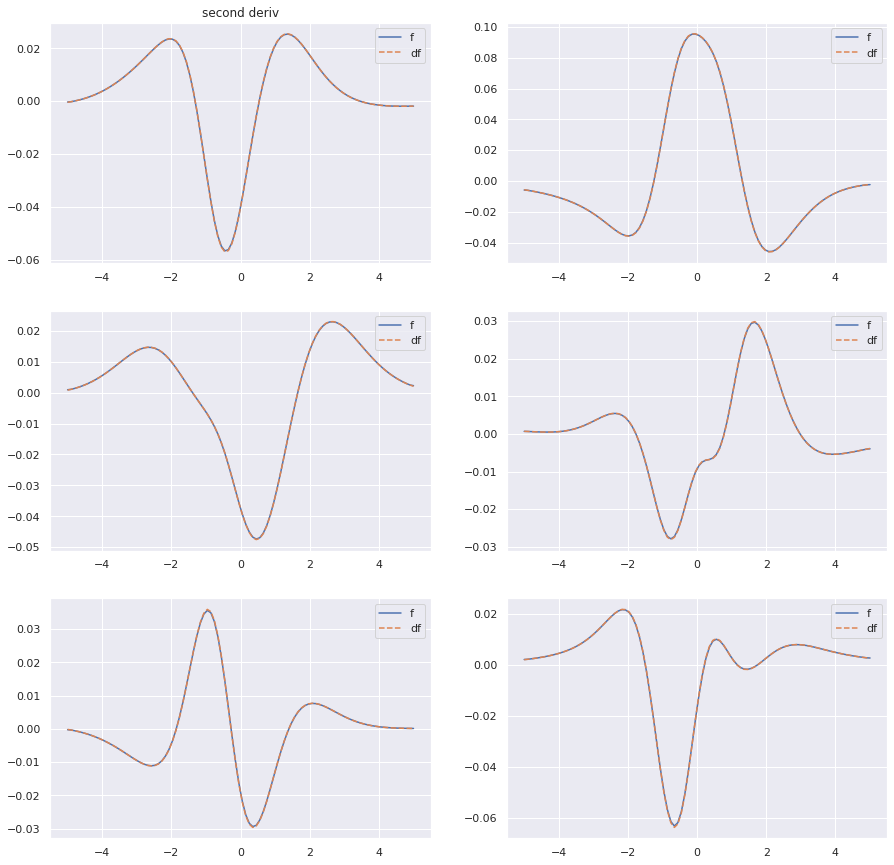

In [25]:
y_slice = 50
x_slice = 50

plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.title('second deriv')
plt.plot(x_np, np.gradient(df[:, y_slice, 1, 0, 0], x_np))
plt.plot(x_np, df[:, y_slice, 2, 0, 0], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(322)
plt.plot(x_np, np.gradient(df[x_slice, :, 1, 1, 0], x_np))
plt.plot(x_np, df[x_slice, :, 2, 1, 0], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(323)
plt.plot(x_np, np.gradient(df[:, y_slice, 1, 0, 1], x_np))
plt.plot(x_np, df[:, y_slice, 2, 0, 1], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(324)
plt.plot(x_np, np.gradient(df[x_slice, :, 1, 1, 1], x_np))
plt.plot(x_np, df[x_slice, :, 2, 1, 1], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(325)
plt.plot(x_np, np.gradient(df[:, y_slice, 1, 0, 2], x_np))
plt.plot(x_np, df[:, y_slice, 2, 0, 2], '--')

plt.legend(['f', 'df', 'df auto'])

plt.subplot(326)
plt.plot(x_np, np.gradient(df[x_slice, :, 1, 1, 2], x_np))
plt.plot(x_np, df[x_slice, :, 2, 1, 2], '--')

plt.legend(['f', 'df', 'df auto'])

plt.show()

# %%


# Speed

Let's check the speed of the pass:

In [51]:
samples = 100
x, y = torch.meshgrid(torch.linspace(-5, 5, samples), torch.linspace(-5, 5, samples))
X = torch.cat((x.reshape(-1, 1), y.reshape(-1, 1)), dim=1)

dX = torch.eye(X.shape[1]) * torch.ones(X.shape[0])[:, None, None] 
d2X = torch.zeros_like(dX)
d3X = torch.zeros_like(dX)

data = [X, dX, d2X, d3X]

In [52]:
#%%
layer_1 = Linear(2, 40)
activation_1 = Tanh()
layer_2 = Linear(40, 40)
activation_2 = Tanh()
layer_3 = Linear(40, 3)

network = nn.Sequential(*[layer_1, activation_1,
                          layer_2, activation_2,
                          layer_3])

f, df, d2f, d3f= network(data)

In [53]:
#%timeit network([X]) 
#%timeit network([X, dX]) 
#%timeit network([X, dX, d2X]) 
%timeit network(data) 

1.24 ms ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


let's compare it with a network without these extra calculations:

In [29]:
layer_1 = torch.nn.Linear(2, 40)
activation_1 = torch.nn.Tanh()
layer_2 = torch.nn.Linear(40, 40)
activation_2 = torch.nn.Tanh()
layer_3 = torch.nn.Linear(40, 3)

network_normal = nn.Sequential(*[layer_1, activation_1,
                          layer_2, activation_2,
                          layer_3])

In [30]:
%%timeit
network_normal(X)

147 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Let's profile it:

In [31]:
with torch.autograd.profiler.profile(use_cuda=True) as prof:
    df = network(data)
print(prof.key_averages().table(sort_by="self_cpu_time_total"))

------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name                Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     CUDA total %     CUDA total       CUDA time avg    Number of Calls  
------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
mul                 21.51%           408.473us        21.51%           408.473us        17.020us         24.21%           610.304us        25.429us         24               
addmm               10.80%           205.121us        10.80%           205.121us        68.374us         8.61%            217.088us        72.363us         3                
pow                 9.20%            174.631us        9.20%            174.631us        17.463us         7.02%            177.088

# Actually training the network

In [17]:
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from os import listdir, path

In [18]:
data_folder = '../data/raw/RD_0.5_1/'

In [19]:
data_list = [loadmat(path.join(data_folder, file))['Expression1'].reshape(201, 201, 3) for file in listdir(data_folder) if file[-3:] == 'mat']

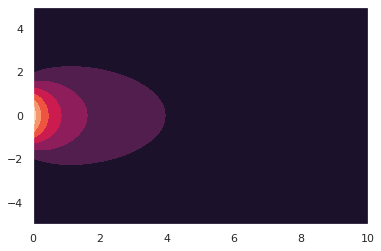

In [20]:
plt.contourf(data_list[0][:, :, 0], data_list[0][:, :, 1], data_list[0][:, :, 2])

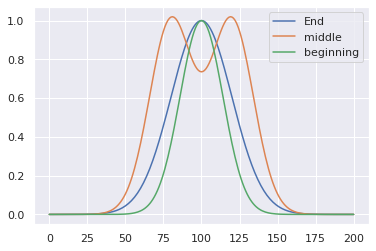

In [21]:
plt.plot(data_list[0][:, 0, 2])
plt.plot(data_list[1][:, 0, 2])
plt.plot(data_list[2][:, 0, 2])

plt.legend(['End', 'middle', 'beginning'])

That looks fine. Prep it into a nice 1D array for torch:

In [22]:
X_full = np.concatenate((data_list[0][:, :, 0].reshape(-1, 1), data_list[0][:, :, 1].reshape(-1, 1)), axis=1)
y_full = np.concatenate(([data[:, :, 2].reshape(-1, 1) for data in data_list]), axis=1)

In [23]:
print(X_full.shape, y_full.shape)

(40401, 2) (40401, 3)


In [24]:
num_samples = 5000
rand_idx = np.random.permutation(X_full.shape[0])[:num_samples]

X_train = torch.tensor(X_full[rand_idx, :], dtype=torch.float32, requires_grad=True)
y_train = torch.tensor(y_full[rand_idx, 0:1], dtype=torch.float32, requires_grad=True)

dX = torch.eye(X_train.shape[1]) * torch.ones(X_train.shape[0])[:, None, None] 
d2X = torch.zeros_like(dX)
d3X = torch.zeros_like(dX)

dX = torch.stack([dX, d2X, d3X], dim=1)
data = [X_train, dX]

In [25]:
#%%
layer_1 = Linear(2, 40)
activation_1 = Tanh()
layer_2 = Linear(40, 40)
activation_2 = Tanh()
layer_3 = Linear(40, 40)
activation_3 = Tanh()
layer_4 = Linear(40, 40)
activation_4 = Tanh()
layer_5 = Linear(40, 1)

network = nn.Sequential(*[layer_1, activation_1,
                          layer_2, activation_2,
                          layer_3, activation_3,
                          layer_4, activation_4,
                          layer_5])

In [26]:
iterations = 5000
k = nn.Parameter(torch.rand(1))
D = nn.Parameter(torch.rand(1))
optimizer = torch.optim.Adam([{'params':network.parameters()}, {'params': [k, D]}])

In [27]:
%%time

for it in np.arange(iterations):
    output = network(data)
    c = output[0]
    dcdt = output[1][:, 0, 0, :]
    dcdxx = output[1][:, 1, 1, :]
    
    mse = torch.mean((c - y_train)**2)
    pi = torch.mean((dcdt - D*dcdxx - k * c**2)**2)
    loss = mse + pi

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if it % 500 == 0:
        print(it, mse.item(), pi.item(), k.item(), D.item())

RuntimeError: The size of tensor a (3) must match the size of tensor b (5000) at non-singleton dimension 1